In [1]:
# Useful starting lines
%matplotlib inline
import datetime
from costs import compute_loss
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload

%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
# standardize the data
tX_std = standardize(tX)


# least squares GD

In [3]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    return (-1/len(y))*tx.T@(y-tx@w)
    # ***************************************************


def least_squares_GD(y, tx, initial_w, max_iters, gamma):
    """least square gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # compute gradient computes the gradient
        gradient = compute_gradient(y,tx,w)
        # compute loss. here MSE is used
        loss = compute_loss(y,tx,w)
        # ***************************************************
        # TODO: update w by gradient
        w = w-gamma*gradient
        # ***************************************************
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}".format(
              bi=n_iter, ti=max_iters - 1, l=loss))

    return np.array(losses), np.array(ws)

# least square SGD

In [4]:

def compute_stoch_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    e = y-tx@w
    return -1/len(y)*tx.T@e
    # ***************************************************


def least_squares_SGD(y, tx, initial_w, batch_size, max_iters, gamma):
    """Least square stochastic gradient descent algorithm."""
    # ***************************************************
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # compute random batch
        a = batch_iter(y, tx, batch_size, num_batches=1, shuffle=True)
        a = list(a)
        tx2, y2 = a[0][1], a[0][0]
        
        # compute gradient & loss
        grad = compute_stoch_gradient(y2,tx2,w)
        loss= compute_loss(y2, tx2, w)
        print(grad)
        # update gradient
        w = w-gamma*grad
        
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("stoch Gradient Descent({bi}/{ti}): loss={l}".format(
              bi=n_iter, ti=max_iters - 1, l=loss))

    return np.array(losses), np.array(ws)

# least square
computed by solving for w:  X<sup>T</sup>X * w = X<sup>T</sup>y

In [5]:
def least_square(y, tx):
    w = np.linalg.solve(tx.T@tx,tx.T@y)
    return w, compute_loss(y, tx, w)


In [6]:
wls, loss = least_square(y, tX_std)

# Ridge regression

In [7]:
def ridge_regression(y, tx, lamda):
    w = np.linalg.solve(tx.T@tx+lamda*np.eye(len(y)),tx.T@y)
    return w, compute_loss(y, tx, w)


In [ ]:
wls, loss = ridge_regression(y, tX_std,1)

# test GD

Gradient Descent(0/49): loss=1.0
Gradient Descent(1/49): loss=0.9264755130297591
Gradient Descent(2/49): loss=0.8962466370379258
Gradient Descent(3/49): loss=0.8771600577769223
Gradient Descent(4/49): loss=0.8642270151661157
Gradient Descent(5/49): loss=0.8551458442459039
Gradient Descent(6/49): loss=0.8485355498878918
Gradient Descent(7/49): loss=0.8435390789639572
Gradient Descent(8/49): loss=0.839618166428172
Gradient Descent(9/49): loss=0.836430789564036
Gradient Descent(10/49): loss=0.8337566792321113
Gradient Descent(11/49): loss=0.8314517631067185
Gradient Descent(12/49): loss=0.8294201370090645
Gradient Descent(13/49): loss=0.827596702095248
Gradient Descent(14/49): loss=0.8259363236853894
Gradient Descent(15/49): loss=0.8244070000529391
Gradient Descent(16/49): loss=0.8229855127345691
Gradient Descent(17/49): loss=0.8216546239049244
Gradient Descent(18/49): loss=0.8204012464387307
Gradient Descent(19/49): loss=0.8192152314360012
Gradient Descent(20/49): loss=0.8180885519776158

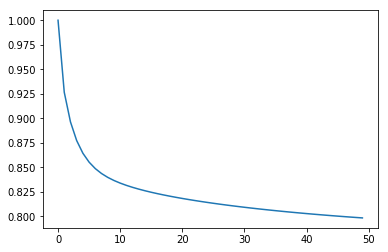

In [65]:
# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
# Initialization
w_initial = np.zeros(30)

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = least_squares_GD(y, tX_std, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))
plt.plot(gradient_losses)

# test SGD

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[ 0.52014216  0.43475063  1.36637079 -0.50759061 -0.63936707 -0.60452962
 -0.63936262  0.79306754  0.29935496 -0.32590579  0.27865405 -1.0754978
 -0.63936836  0.28786233  0.70092226 -0.49088995  1.30999104 -0.27865471
  0.98780662 -0.68592461 -1.32814009 -0.01846792 -1.00179211 -1.22085772
 -1.22562837 -1.22562821 -0.63895617 -0.63936657 -0.63936694 -0.74543941]
stoch Gradient Descent(0/49): loss=1.0
[-0.43905041  1.14367174  0.14146096  0.99987755  0.70933081  0.67068122
  0.70932588 -0.75514929  0.91606076  0.75240818  1.16966676  1.13834574
  0.70933224 -0.64235858 -0.78675981  1.65723314  0.9243114  -0.70996329
 -0.37342499  0.57541879 -0.10720662  1.16379252  1.11141478  1.35445199
  1.35974467  1.3597445   0.70887495  0.70933026  0.70933067  0.82701029]
stoch Gradient Descent(1/49): loss=1.2308273068025894
[-2.40353674  0.64670816 -0.85649601 -0.69340505 -0.65732888 -0.62151274
 -0.657324

[-0.21291887  0.59020853  0.34626279 -0.16518509  0.34844502  0.32945916
  0.3484426  -0.0577069   0.43548765  0.10432465  0.18942195 -0.62887106
  0.34844573  0.27493357 -0.88699071  0.66319573  0.3782236  -0.88168573
 -0.05773733 -0.33144709  0.00116707  0.21158948 -0.01161088 -0.43547228
 -0.44862535 -0.44792826  0.34822109  0.34844475  0.34844495 -0.02486187]
stoch Gradient Descent(22/49): loss=0.29700790543408206
[ 0.33869756  0.31290415  0.14833291 -0.65048913 -0.48541342 -0.45896451
 -0.48541005  0.59531616 -0.53042114 -0.50141497  0.18459431 -0.80062603
 -0.4854144  -0.26017474  0.37956397  0.78487275  0.14891088  0.9815909
 -0.68938847 -0.46684537  0.4215026  -0.51515013 -0.76056989 -0.92688653
 -0.93050846 -0.93050834 -0.48510147 -0.48541304 -0.48541333 -0.56594454]
stoch Gradient Descent(23/49): loss=0.5763987628207958
[ 0.31206931 -1.9666843  -2.38099654  0.98596738 -0.99442692 -0.94024319
 -0.99442001 -3.29994542 -1.02287679 -0.11415324  0.1093494   1.18880358
 -0.99442893

[ 0.39706233 -0.8083976   0.18973918 -0.16174908 -0.62216165 -0.58826168
 -0.62215733 -0.23130626  0.06442577  0.03962623 -0.0536912  -1.04247973
 -0.62216291  0.14278421 -0.82877928 -0.6035504   0.5185781  -1.06502564
  0.52465913 -1.15710812  1.56154491  0.08992344  0.02073166  0.75051904
  0.79429208  0.78874003 -0.62176181 -0.62216116 -0.62216153 -0.10260102]
stoch Gradient Descent(45/49): loss=0.9469040008466273
[ 0.40821875  0.83777336  0.04220444 -0.91673418 -0.66568714 -0.62941558
 -0.66568251  0.44670264 -0.79790092 -0.64089377  0.25191675 -1.08749633
 -0.66568848 -0.2647238   0.95103159  0.62935036  0.35572974  0.80044099
 -0.95057305 -0.37567963  1.18473978 -0.81479055 -1.04303171 -1.27111533
 -1.27608237 -1.27608221 -0.66525933 -0.66568662 -0.66568701 -0.77612604]
stoch Gradient Descent(46/49): loss=1.084026275420479
[ 0.6270696  -0.30266148  0.26924945 -1.28827173 -0.92093773 -0.87075823
 -0.92093133  1.34470329 -1.16107906 -0.89073323 -0.40344873 -1.54430882
 -0.92093959 

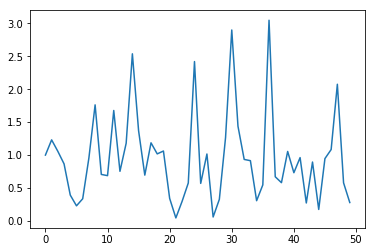

In [75]:
from proj1_helpers import batch_iter
# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.01
batch_size = 1

# Initialization
w_initial = np.zeros(30)
print(w_initial)

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = least_squares_SGD(
    y, tX_std, w_initial,batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

plt.plot(sgd_losses)

## Do your thing crazy machine learning thing here :) ...

## Generate predictions and save ouput in csv format for submission:

In [21]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [50]:
tX_test_std = standardize(tX_test)  # standardize par rapport a tX_train mean and std? 

In [ ]:
OUTPUT_PATH = '' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

In [71]:
predict_labels(gradient_ws[-1], tX_test_std)

array([-1., -1., -1., ...,  1.,  1., -1.])